# My Data Project - So Far....

## I've seen enough episodes of SNL to wonder why actors are hosting an episode when they don't seem to know what they're doing (wait for the upcoming irony). Do they (or their managers) think any exposure, good or bad, means money down the line?


## So my goal for this project was to create a model to determine if an actor hosting an episode of Saturday Night Live [SNL] would predicts if their upcoming movie will be financially successful at the box office. 

    * I defined "upcoming movie" as a movie within 30 days of their hosting gig.
    * I defined "financially successful" per the traditional calculation is the domestic revenue is 2x the budget.   


## My initial data source was IMDb (or thru using OMDb). I needed to capture

    * all 42 seasons of SNL, including the Air Date and the Guest Host.
    * all actor bios of the Guest Hosts over the 42 seasons.

## Unfortunately... collecting the data proved to be more onerous than I estimated!

#### SNL EPISODES: I had to scrape and save HTML for each season, then I had to clean out the HTML code, then I had to pivot the data out, clean it up add in some manual information....
#### ACTOR BIOS: I could not find a way to bulk-pull all of the actor names and their bios. I started manually loading actor IMDb pages and grabbing html of their Filmographies, but the code was too inconsistent to parse and didn't have release dates, only release years. OMDb does not have data where you can query for specific actors. I also checked out Wikipedia, but that was also too inconsistent.
#### "UPCOMING MOVIE": When I tried manually pulling actor information for a Season and figuring out what movie is within 30 days of their appearance, I found either 
    A) it wasn't an actor (there are athletes, musicians and other types of people)
    B) the actor didn't have a movie that fit parameters (30 days was too short!)


## TLDR: To complete the project in the alloted time, I need to go back and determine a new goal based on my data limitations.



## But in the interest of having some data to analyze for this presentation, I used the SNL Season data I was able to put together and tried to pull some basic stats.


-----------------------------------------------------------------------------------------------------------------------------

### For the Episode data, I started from the IMDb website at the Saturday Night Live Seasons/ Episodes page:

[I started on this page](http://www.imdb.com/title/tt0072562/episodes?season=42)


### Since I didn't have a tool to scrape from a website with drop-down menus, I manually pulled HTML for each season:

[Example screenshot of grabbing HTML code for Season 42](https://imgur.com/a/IPmpG)

### Next I looked back to the homework for reading HTML, then found a resource to clean out all the HTML code:

In [42]:
# I utilized a structured Soup object to read the HTML
import urllib
from bs4 import BeautifulSoup
url = "../ProjectData/S42.html"
html = urllib.urlopen(url).read()
b = BeautifulSoup(html)

# killed all script and style elements
for script in b(["script", "style"]):
    script.extract()    # rip it out

# get text
text = b.get_text()

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())

# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))

# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)

print(text)


#RESOURCE: https://stackoverflow.com/questions/328356/extracting-text-from-html-file-using-python



Season 42
S42, Ep1
1 Oct. 2016
Margot Robbie/The Weeknd
Margot Robbie hosts Saturday Night Live with musical guest The Weeknd. Sketches include Donald Trump vs. Hillary Clinton Debate Cold Open, Margot Robbie Monologue, Live Report, The Librarian, Celebrity Family Feud: Political Edition, Weekend Update: Undecided Voter Cathy Anne, Weekend Update: David Ortiz on Yankee Stadium, The Hunch Bunch, Melania Moments, Actress Round Table, and Mr. Robot.
S42, Ep2
8 Oct. 2016
Lin-Manuel Miranda/Twenty One Pilots
Lin-Manuel Miranda hosts Saturday Night Live with musical guest Twenty One Pilots. Sketches include VP Debate Cold Open, Lin-Manuel Miranda Monologue, Crucible Cast Party, Substitute Teacher, A Day-Off, Weekend Update: Pete Davidson on Gonig Bald, Weekend Update: Denise McDonough and Doreen Troilo, Wells Fargo Wagon, Diego Calls His Mom, Stranger Things, Melania Moments No. 78: The Dream, and WWII Scene.
S42, Ep3
15 Oct. 2016
Emily Blunt/Bruno Mars
Emily Blunt hosts with musical guest B

### I grabbed the data and added it into Excel... where I performed some Excel magic, added in the Gender column (including a numeric version), and turned the data into a table I could use. Then I converted it to a CSV file so I could perform some Python on the data:

In [43]:
# Here is a copy of the CSV file I created from IMDb and from manual entry
import pandas as pd
url = '../ProjectData/SNL_CSV.csv'
SNL = pd.read_csv(url, sep=',')
SNL.tail(25)

,Season,Episode,Seasonnum,Episodenum,Airdate,Airyear,Host,HostClean,MusicalGuest,Description,Gender,GenderNum,Profession
807,S41,Ep18,41,18,04/16/2016,2016,Julia Louis-Dreyfus,Julia Louis-Dreyfus,Nick Jonas,Julia Louis-Dreyfus hosts SNL for the third ti...,F,1,Comedian
808,S41,Ep19,41,19,05/07/2016,2016,Brie Larson,Brie Larson,Alicia Keys,It's the Mother's Day episode and Oscar winner...,F,1,Actor
809,S41,Ep20,41,20,05/14/2016,2016,Drake,Drake,None,Drake serves as host for the second time and m...,M,0,Musician
810,S41,Ep21,41,21,05/21/2016,2016,Fred Armisen,Fred Armisen,Courtney Barnett,Fred Armisen hosts with musical guest Courtney...,M,0,Actor
811,S42,Ep1,42,1,10/01/2016,2016,Margot Robbie,Margot Robbie,The Weeknd,Margot Robbie hosts Saturday Night Live with m...,F,1,Actor
812,S42,Ep2,42,2,10/08/2016,2016,Lin-Manuel Miranda,Lin-Manuel Miranda,Twenty One Pilots,Lin-Manuel Miranda hosts Saturday Night Live w...,M,0,Actor
813,S42,Ep3,42,3,10/15/2016,2016,Emily Blunt,Emily Blunt,Bruno Mars,Emily Blunt hosts with musical guest Bruno Mar...,F,1,Actor
814,S42,Ep4,42,4,10/22/2016,2016,Tom Hanks,Tom Hanks,Lady Gaga,Does not include musical performances or sketc...,M,0,Actor
815,S42,Ep5,42,5,11/05/2016,2016,Benedict Cumberbatch,Benedict Cumberbatch,Solange,Does not include musical performances or sketc...,M,0,Actor
816,S42,Ep6,42,6,11/12/2016,2016,Dave Chappelle,Dave Chappelle,A Tribe Called Quest,America's premier sketch-comedy show returns f...,M,0,Comedian


##### Data Notes
1. I broke out 'Airdate' into 'Airyear', because I want to roll up on this value
2. 'HostClean' was created because there were two people whose names changed ['The Rock' & 'Dwayne Johnson', 'Roseanne Barr' & 'Roseanne']
3. Gender has four values
    0/M = Male (where the host or hosts are all male)
    1/F = Female (where the host or hosts are all female)
    2/B = Both (where there are multiple hosts of male and female genders)
    9/N = None (where there is no host)
4. 'Profession' is a column I tried to split Hosts into 'Comedian', 'Actor', 'Sports [Athlete]' or 'Other'. But because people fit into multiple categories, this was a bust. Since I was thinking there might be a difference between actors and non-actors, maybe I can convert this column into 'Actor' (0 vs 1)

In [44]:
# Time for a quick description
SNL.describe()

# 832 Episodes, Years 1975 thru 2017, Seasons 1 thru 42)

,Seasonnum,Episodenum,Airyear,GenderNum
count,832.000000,832.000000,832.000000,832.000000
mean,21.742788,10.537260,1996.305288,0.350962
std,12.304058,5.906292,12.300414,0.767511
min,1.000000,1.000000,1975.000000,0.000000
25%,11.000000,5.000000,1986.000000,0.000000
50%,22.000000,10.000000,1996.000000,0.000000
75%,32.000000,16.000000,2007.000000,1.000000
max,42.000000,24.000000,2017.000000,9.000000


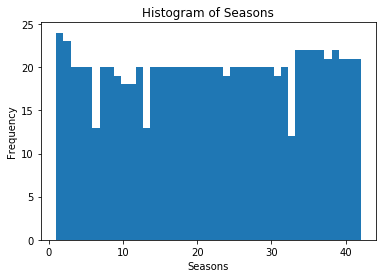

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

SNL.Seasonnum.plot(kind='hist', bins=42, title = 'Histogram of Seasons')
plt.xlabel('Seasons')
plt.ylabel('Frequency')



In [46]:
#Let's do a quick count of Gender.
SNL.groupby('Gender').Host.count()
# Note that less than half the hosts are Female.

Gender
B      6
F    244
M    578
N      4
Name: Host, dtype: int64

In [47]:
#Let's count grouped by both Season and Gender
SNL.groupby(['Seasonnum','Gender']).size()

#RESOURCE: https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts

Seasonnum  Gender
1          F          8
           M         16
2          F          7
           M         15
           N          1
3          F          3
           M         17
4          F          5
           M         15
5          B          1
           F          2
           M         17
6          F          6
           M          6
           N          1
7          F          6
           M         13
           N          1
8          F          4
           M         16
9          B          1
           F          3
           M         15
10         F          2
           M         15
           N          1
11         B          1
           F          5
           M         12
12         F          3
                     ..
28         M         14
29         B          1
           F          9
           M         10
30         F          6
           M         14
31         F          6
           M         13
32         F          6
           M         1

## Next Step #1: See if I can work the OMDb data into my dataset. That dataset has IMDb ratings:

In [48]:
# Example of json view of data from OMDb
import pandas as pd
import requests

r42 = requests.get('http://www.omdbapi.com/?apikey=da47600f&i=tt0072562&Season=42')
r42.json()

{u'Episodes': [{u'Episode': u'1',
   u'Released': u'2016-10-01',
   u'Title': u'Margot Robbie/The Weeknd',
   u'imdbID': u'tt6075310',
   u'imdbRating': u'7.7'},
  {u'Episode': u'2',
   u'Released': u'2016-10-08',
   u'Title': u'Lin-Manuel Miranda/Twenty One Pilots',
   u'imdbID': u'tt6106682',
   u'imdbRating': u'7.9'},
  {u'Episode': u'3',
   u'Released': u'2016-10-15',
   u'Title': u'Emily Blunt/Bruno Mars',
   u'imdbID': u'tt6106684',
   u'imdbRating': u'6.3'},
  {u'Episode': u'4',
   u'Released': u'2016-10-22',
   u'Title': u'Tom Hanks/Lady Gaga',
   u'imdbID': u'tt6132822',
   u'imdbRating': u'8.0'},
  {u'Episode': u'5',
   u'Released': u'2016-11-05',
   u'Title': u'Benedict Cumberbatch/Solange',
   u'imdbID': u'tt6221748',
   u'imdbRating': u'6.5'},
  {u'Episode': u'6',
   u'Released': u'2016-11-12',
   u'Title': u'Dave Chappelle/A Tribe Called Quest',
   u'imdbID': u'tt6222376',
   u'imdbRating': u'8.0'},
  {u'Episode': u'7',
   u'Released': u'2016-11-19',
   u'Title': u'Kriste

## Next Step #2: brainstorm ways I can get Actor Biographical data.

#### * One potential way to do it would be to grab the Bios from the IMDb Actor Bio URL, which does appear to be standardized:
[Example of Margot Robbie's Bio info] (http://www.imdb.com/name/nm3053338/bio?ref_=nm_ov_bio_sm)  
       * note that the "nm*" value in the URL can be replaced with any actor's code and it will bring up this page
#### and then grab specific HTML tags (like birthDate, height, birth_place)
